# Introduction to Pandas

Pandas is an open source library built on top of NumPy.<br>
It allows for fast analysis and data cleaning and preparation.<br>
You can think of pandas as an extremely powerful version of Excel, with a lot more features.<br>
It also has built-in visualization features.<br><br>
In this section of the course we will learn how to use pandas for data analysis.  In this section of the course, you should go through the notebooks in this order:

* Introduction to Pandas
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations
* Data Input and Output

___

# Series

The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Let's explore this concept through some examples:

In [3]:
import numpy as np
import pandas as pd

### Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [9]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

** Using Lists**

pd.Series can take a number of options (shift+tab) but ew will focus primarily on data and index.

In [4]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

It looks a lot like numpy array but it has an index and data against it. The important aspect is that we can specify what the index should be.

In [5]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

You dont need to specify the 'data' and 'index' as long as thet are in the correct order.

In [6]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

** NumPy Arrays **

You can also create a series from a numpy array. works exactly the same way.

In [7]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [8]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int64

** Dictionary**

You can also pass a dictionary. Pandas is going to automatically use the keys as labels and the values as the values.

In [9]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Data in a Series

The other difference between a numpy array and a pandas Series is that the latter can hold a variety of object types:

In [10]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [11]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [18]:
ser1 = pd.Series(index = ['USA', 'Germany','USSR', 'Japan'], data = [1,2,3,4])                                   

In [19]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [14]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])                                   

In [15]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

Accessing a value is going to work very similar to a python dictionary. Here we are passing the index label as a string because we know it is a string. If it were an integer, we would pass an integer as the index label.

In [20]:
ser1['USA']

1

Operations are then also done based off of index.<br>
You will also notice that the reults now have a decimal point. Pandas automatically converts the comnputational results in floats to avoid losing any accuracy.

In [17]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [183]:
import pandas as pd
import numpy as np

In [24]:
from numpy.random import randn
np.random.seed(101)

The first 2 arguments are similar to Panda Series - the first one being data and the second one being index. However, we will see one additional argument - columns

In [ ]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

The resulting data frame looks very much like Excel spreadsheet<br>

In [186]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame<br>
Each of the columns is nothing but a Panda series. Just that they share a common indexes A, B, C, D and E.<br>
You can confirm that by getting the 'type' of any column.

In [187]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [190]:
type(df['W'])

pandas.core.series.Series

There are 2 ways to specify columns - the bracket notation and the dot notation.<br>
To get multiple columns, you can specify the column as a list

In [27]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [29]:
# SQL Syntax (NOT RECOMMENDED!) since Pandas may confuse it various methods that are available
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

DataFrame Columns are just Series

**Creating a new column:**

You can simply create a new column using assignment

In [36]:
df['new'] = df['W'] + df['Y']

In [37]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


** Removing Columns**

Columns can be dropped by specifying their name. However, the code below gives an error because we also need to specify the 'axis' parameter as 1 because by default it is 0.

In [38]:
#df.drop('new') will generate an error

In [39]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [40]:
# Not inplace unless specified!
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


A lot of functions in pandas require the inplace argument. This is done to avoid accidently modifying the original data frame

In [195]:
df.drop('new',axis=1,inplace=True)

In [196]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Can also drop rows this way:

In [197]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


** Selecting Rows**

There are 2 ways of selecting rows in a dataframe

In [198]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

The above shows that the rows are series as well

Or select based off of position instead of label using iloc

In [199]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

** Selecting subset of rows and columns **

This is similar to accessing elements in the numpy array using a comma notation

In [200]:
df.loc['B','Y']

-0.84807698340363147

You can also specify the row or column argument as a list to get data from specific rows or columns

In [201]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [202]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Specifying a boolean condition, Pandas will apply it to all the elements. Will return 'True' for the elements for which the condition is true. Returns False for the rest.

In [203]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


Returns the value where 'True' and NaN where 'False'

In [204]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [43]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [42]:
df['W'] > 0

A     True
B     True
C    False
D     True
E     True
Name: W, dtype: bool

You can now use series of boolean values corresponding to rows to filter out rows based on a column's value.

In [205]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Since the above command returns a data frame, we can stack regular data frames command to the result.

In [206]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [207]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


For two conditions you can use | and & with parenthesis:<br>
The conventional 'and' and 'or' operators can only compare individual boolean values. they get confused when the trying to compare one series of boolean against the other.

In [208]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [46]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [47]:
# Reset to default 0,1...n index. The original index gets moved to a new column.
df.reset_index()

,index,W,X,Y,Z,new
0,A,2.706850,0.628133,0.907969,0.503826,3.614819
1,B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
2,C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
3,D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
4,E,0.190794,1.978757,2.605967,0.683509,2.796762


Like most commands, the reset_index() will change the original data frame only whe the inplace is set to True.

In [48]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [211]:
newind = 'CA NY WY OR CO'.split()

We can create a new column as shown below.

In [212]:
df['States'] = newind

In [213]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


set_index can be used to convert one of the existing columns into the index for the dataframe.<br>
It will overwrite the existing index and thay information will be lost.

In [214]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [215]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [216]:
df.set_index('States',inplace=True)

In [218]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


## Multi-Index and Index Hierarchy (skip)

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [253]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [254]:
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [257]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  0.153661  0.167638
   2 -0.765930  0.962299
   3  0.902826 -0.537909
G2 1 -1.549671  0.435253
   2  1.259904 -0.447898
   3  0.266207  0.412580

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [260]:
df.loc['G1']

,A,B
1,0.153661,0.167638
2,-0.765930,0.962299
3,0.902826,-0.537909


In [263]:
df.loc['G1'].loc[1]

A    0.153661
B    0.167638
Name: 1, dtype: float64

In [265]:
df.index.names

FrozenList([None, None])

In [266]:
df.index.names = ['Group','Num']

In [267]:
df

A         B
Group Num                    
G1    1    0.153661  0.167638
      2   -0.765930  0.962299
      3    0.902826 -0.537909
G2    1   -1.549671  0.435253
      2    1.259904 -0.447898
      3    0.266207  0.412580

In [270]:
df.xs('G1')

,A,B
Num,,
1,0.153661,0.167638
2,-0.765930,0.962299
3,0.902826,-0.537909


In [271]:
df.xs(['G1',1])

A    0.153661
B    0.167638
Name: (G1, 1), dtype: float64

In [273]:
df.xs(1,level='Num')

,A,B
Group,,
G1,0.153661,0.167638
G2,-1.549671,0.435253


# Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:<br>
Often times, when importing data into Pandas, Pandas will replace the missing values with NaN or Null.<br>
In the following sections, we will see how we can use some common pandas functions like dropna or fillna to either drop or fill those missing values.

In [50]:
import numpy as np
import pandas as pd

Lets create a dataframe using dictionaries where the key is a letter and the value for that key is a list.

In [51]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [52]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


Lets explore the dropna method. The method is typically used when there a few missing pieces of data which can be dropped. Without any argument, the method will drop all rows with 1 or more missing data.

In [12]:
df.dropna()

,A,B,C
0,1.0,5.0,1


Specifying axis = 1 will drop all columns where the column has 1 or more missing values. Note that axis=0 is the default.

In [53]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


Check the documentation of dropna. It requires atleast thresh number of non-null values for the column to not be dropped.

In [14]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


A lot of times you might have to fill in some values inctead of discarding them.

In [15]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [17]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# Groupby

The groupby method allows you to group rows of data together and call aggregate functions. An aggregate function takes a bunch of value, performs some operation on them and returns a single value. Example of aggregate functions are mean, sum, stndard deviation<br><br>

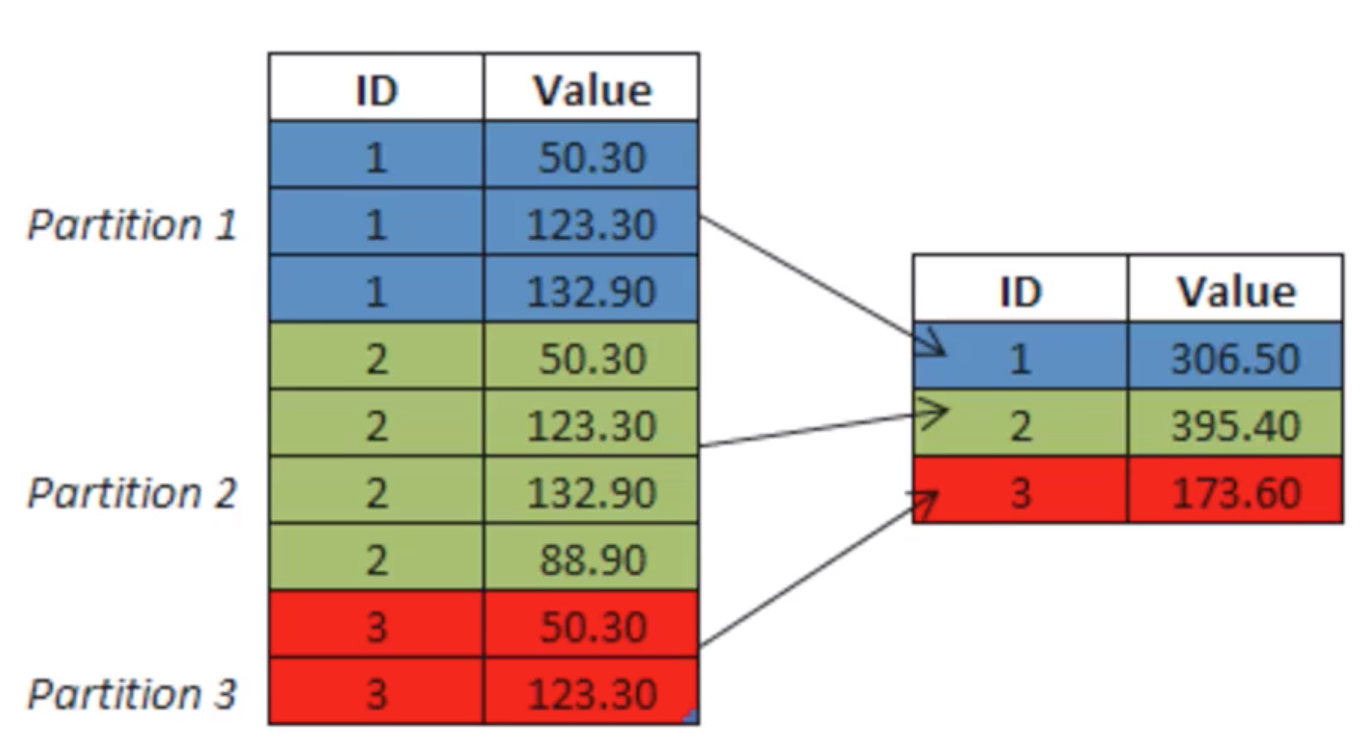

In [56]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [57]:
df = pd.DataFrame(data)

In [58]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


** Now you can use the .groupby() method to group rows together based off of a column name. For instance let's group based off of Company. This will create a DataFrameGroupBy object:**

In [59]:
df.groupby('Company')

You can save this object as a new variable:

In [60]:
by_comp = df.groupby("Company")

And then call aggregate methods off the object:

In [61]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [62]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


Note that the above result is a regular data frame. Hence the usual dataframe commands can be stacked on top of the results.

In [65]:
df.groupby('Company').mean().loc['GOOG']

Sales    160.0
Name: GOOG, dtype: float64

More examples of aggregate methods:

In [38]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [39]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [40]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [41]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [42]:
by_comp.describe()

Sales
Company                  
FB      count    2.000000
        mean   296.500000
        std     75.660426
        min    243.000000
        25%    269.750000
        50%    296.500000
        75%    323.250000
        max    350.000000
GOOG    count    2.000000
        mean   160.000000
        std     56.568542
        min    120.000000
        25%    140.000000
        50%    160.000000
        75%    180.000000
        max    200.000000
MSFT    count    2.000000
        mean   232.000000
        std    152.735065
        min    124.000000
        25%    178.000000
        50%    232.000000
        75%    286.000000
        max    340.000000

In [43]:
by_comp.describe().transpose()

Company    FB                                                         GOOG  \
        count   mean        std    min     25%    50%     75%    max count   
Sales     2.0  296.5  75.660426  243.0  269.75  296.5  323.25  350.0   2.0   

Company         ...                  MSFT                                   \
          mean  ...      75%    max count   mean         std    min    25%   
Sales    160.0  ...    180.0  200.0   2.0  232.0  152.735065  124.0  178.0   

Company                       
           50%    75%    max  
Sales    232.0  286.0  340.0  

[1 rows x 24 columns]

In [44]:
by_comp.describe().transpose()['GOOG']

,count,mean,std,min,25%,50%,75%,max
Sales,2.0,160.0,56.568542,120.0,140.0,160.0,180.0,200.0


# Merging, Joining, and Concatenating (skip)

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. In this lecture we will discuss these 3 methods with examples.

____

### Example DataFrames

In [3]:
import pandas as pd

In [4]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [5]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [6]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [7]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [8]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [12]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [10]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [18]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


_____
## Example DataFrames

In [28]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [29]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [30]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


___

## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [35]:
pd.merge(left,right,how='inner',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


Or to show a more complicated example:

In [67]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [68]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [69]:
right

,C,D,key1,key2
0,C0,D0,K0,K0
1,C1,D1,K1,K0
2,C2,D2,K1,K0
3,C3,D3,K2,K0


In [39]:
pd.merge(left, right, on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [40]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


In [41]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K2,K0,C3,D3


In [42]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [46]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [47]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [48]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this lecture:

In [52]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values

In [53]:
df['col2'].unique()

array([444, 555, 666])

In [54]:
df['col2'].nunique()

3

In [55]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting Data

In [56]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [57]:
newdf

,col1,col2,col3
3,4,444,xyz


### Applying Functions

In [58]:
def times2(x):
    return x*2

In [59]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [60]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [61]:
df['col1'].sum()

10

** Permanently Removing a Column**

In [62]:
del df['col1']

In [63]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Get column and index names: **

In [64]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [65]:
df.index

RangeIndex(start=0, stop=4, step=1)

** Sorting and Ordering a DataFrame:**

In [66]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [67]:
df.sort_values(by='col2') #inplace=False by default

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


** Find Null Values or Check for Null Values**

In [68]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [69]:
# Drop rows with NaN Values
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Filling in NaN values with something else: **

In [71]:
import numpy as np

In [72]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [75]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


In [89]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)

In [90]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [91]:
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [1]:
import numpy as np
import pandas as pd

## CSV

### CSV Input

In [25]:
df = pd.read_csv('example')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### CSV Output

In [24]:
df.to_csv('example',index=False)

## Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash. 

### Excel Input

In [35]:
pd.read_excel('Excel_Sample.xlsx',sheetname='Sheet1')

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### Excel Output

In [33]:
df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

## HTML

You may need to install htmllib5,lxml, and BeautifulSoup4. In your terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install BeautifulSoup4

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

Pandas can read table tabs off of html. For example:

### HTML Input

Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:

In [5]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [7]:
df[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Loss Share Type,Agreement Terminated,Termination Date
0,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","July 12, 2016",none,NaN,NaN
1,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","August 4, 2016",none,NaN,NaN
2,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016",none,NaN,NaN
3,Hometown National Bank,Longview,WA,35156,Twin City Bank,"October 2, 2015","April 13, 2016",none,NaN,NaN
4,The Bank of Georgia,Peachtree City,GA,35259,Fidelity Bank,"October 2, 2015","April 13, 2016",none,NaN,NaN
5,Premier Bank,Denver,CO,34112,"United Fidelity Bank, fsb","July 10, 2015","July 12, 2016",none,NaN,NaN
6,Edgebrook Bank,Chicago,IL,57772,Republic Bank of Chicago,"May 8, 2015","July 12, 2016",none,NaN,NaN
7,Doral BankEn Espanol,San Juan,PR,32102,Banco Popular de Puerto Rico,"February 27, 2015","May 13, 2015",none,NaN,NaN
8,Capitol City Bank & Trust Company,Atlanta,GA,33938,First-Citizens Bank & Trust Company,"February 13, 2015","April 21, 2015",none,NaN,NaN
9,Highland Community Bank,Chicago,IL,20290,"United Fidelity Bank, fsb","January 23, 2015","April 21, 2015",none,NaN,NaN


____

_____
_____
# SQL (Optional)

* Note: If you are completely unfamiliar with SQL you can check out my other course: "Complete SQL Bootcamp" to learn SQL.

The pandas.io.sql module provides a collection of query wrappers to both facilitate data retrieval and to reduce dependency on DB-specific API. Database abstraction is provided by SQLAlchemy if installed. In addition you will need a driver library for your database. Examples of such drivers are psycopg2 for PostgreSQL or pymysql for MySQL. For SQLite this is included in Python standard library by default. You can find an overview of supported drivers for each SQL dialect in the SQLAlchemy docs.


If SQLAlchemy is not installed, a fallback is only provided for sqlite (and for mysql for backwards compatibility, but this is deprecated and will be removed in a future version). This mode requires a Python database adapter which respect the Python DB-API.

See also some cookbook examples for some advanced strategies.

The key functions are:

* read_sql_table(table_name, con[, schema, ...])	
    * Read SQL database table into a DataFrame.
* read_sql_query(sql, con[, index_col, ...])	
    * Read SQL query into a DataFrame.
* read_sql(sql, con[, index_col, ...])	
    * Read SQL query or database table into a DataFrame.
* DataFrame.to_sql(name, con[, flavor, ...])	
    * Write records stored in a DataFrame to a SQL database.

In [36]:
from sqlalchemy import create_engine

In [37]:
engine = create_engine('sqlite:///:memory:')

In [40]:
df.to_sql('data', engine)

In [42]:
sql_df = pd.read_sql('data',con=engine)

In [43]:
sql_df

,index,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


# Great Job!